In [ ]:
# 구글 드라이브 마운트
from google.colab import drive

drive.mount('/content/drive')

import zipfile
import os


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import random
import numpy as np
import torch

# Seed 값 고정
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

# Seed 값 설정
set_seed(42)

In [ ]:
# ZIP 파일 경로 설정 (파일 이름을 업로드된 이름으로 변경해 주세요)
detection_yolov8 = "/content/drive/MyDrive/new_labelled image.v2i.yolov8.zip"

# ZIP 파일 압축 해제
with zipfile.ZipFile(detection_yolov8, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")  # dataset 폴더에 압축 해제

# 압축 해제된 데이터셋 경로 설정
dataset_path = "/content/dataset"
print(f"Dataset is extracted to {dataset_path}")


Dataset is extracted to /content/dataset


In [ ]:
# YOLOv8 설치
!pip install ultralytics


In [ ]:
from ultralytics import YOLO

# YOLOv8 모델 로드 (pre-trained weights 사용)
model = YOLO('/content/yolo8n_6.pt')  # YOLOv8 nano 모델. 필요에 따라 다른 모델 사용 가능

# # 모델 훈련
# model.train(
#     data=f"{dataset_path}/data.yaml",  # 데이터셋 경로
#     epochs=20,  # 훈련할 에포크 수
#     imgsz=640,  # 이미지 크기
#     batch=16,  # 배치 크기
#     name='yolov8-custom-model'  # 훈련된 모델 저장 폴더 이름
# )

model.train(data=f'{dataset_path}/data.yaml', epochs=40, batch=64, imgsz=640)


Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/yolo8n_6.pt, data=/content/dataset/data.yaml, epochs=40, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

train: Scanning /content/dataset/train/labels.cache... 827 images, 0 backgrounds, 0 corrupt: 100%|██████████| 827/827 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/valid/labels.cache... 236 images, 2 backgrounds, 0 corrupt: 100%|██████████| 236/236 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train5
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40       9.2G       1.66      1.368      1.374        521        640: 100%|██████████| 13/13 [00:03<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all        236        969      0.587      0.555      0.601       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      9.08G      1.655      1.327      1.352        493        640: 100%|██████████| 13/13 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all        236        969      0.627      0.587      0.629      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      9.11G      1.658      1.293      1.351        397        640: 100%|██████████| 13/13 [00:02<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all        236        969       0.62        0.6      0.629      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      8.68G      1.695      1.377      1.384        453        640: 100%|██████████| 13/13 [00:02<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all        236        969      0.589      0.626      0.629      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      8.54G      1.667      1.319      1.359        451        640: 100%|██████████| 13/13 [00:02<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all        236        969      0.622      0.598      0.622      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      9.07G      1.674      1.352      1.383        400        640: 100%|██████████| 13/13 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all        236        969      0.636      0.576      0.624      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      9.13G      1.721      1.375      1.398        397        640: 100%|██████████| 13/13 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all        236        969      0.645      0.549      0.602      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      9.09G      1.721      1.396      1.406        418        640: 100%|██████████| 13/13 [00:02<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all        236        969      0.614      0.547      0.604      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      9.12G      1.753       1.41      1.414        495        640: 100%|██████████| 13/13 [00:02<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

                   all        236        969      0.534      0.556      0.583      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      9.18G       1.73      1.392      1.411        439        640: 100%|██████████| 13/13 [00:02<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all        236        969      0.569      0.551      0.588      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      9.11G       1.76      1.414      1.419        449        640: 100%|██████████| 13/13 [00:02<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all        236        969      0.558      0.581      0.603      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      9.14G      1.732      1.407      1.405        399        640: 100%|██████████| 13/13 [00:02<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all        236        969      0.611      0.567      0.615      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      9.12G       1.72      1.375      1.384        514        640: 100%|██████████| 13/13 [00:02<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all        236        969      0.599      0.569      0.603      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      8.62G      1.715      1.369      1.396        480        640: 100%|██████████| 13/13 [00:02<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all        236        969      0.625      0.597      0.634      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      9.06G        1.7      1.338      1.368        516        640: 100%|██████████| 13/13 [00:02<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all        236        969      0.629      0.571      0.613      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      9.06G       1.69      1.364      1.386        477        640: 100%|██████████| 13/13 [00:02<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all        236        969      0.591       0.59      0.609      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      8.56G      1.711      1.362      1.385        505        640: 100%|██████████| 13/13 [00:02<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all        236        969      0.619       0.56      0.608      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      9.03G      1.709      1.349      1.376        526        640: 100%|██████████| 13/13 [00:02<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all        236        969      0.593      0.574      0.606      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      9.09G      1.685      1.325      1.367        486        640: 100%|██████████| 13/13 [00:02<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all        236        969      0.613      0.573      0.604      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      8.51G      1.671      1.303      1.347        396        640: 100%|██████████| 13/13 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all        236        969      0.616      0.564      0.613      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      9.11G      1.666      1.294      1.356        485        640: 100%|██████████| 13/13 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all        236        969       0.59      0.615      0.631      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      9.11G      1.675      1.299      1.349        597        640: 100%|██████████| 13/13 [00:02<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all        236        969      0.614      0.607      0.622      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      9.12G      1.644      1.272      1.338        459        640: 100%|██████████| 13/13 [00:02<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all        236        969      0.661      0.582      0.622      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      9.12G      1.637      1.271      1.331        507        640: 100%|██████████| 13/13 [00:02<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all        236        969      0.641      0.573      0.625      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      9.18G      1.624      1.247      1.336        492        640: 100%|██████████| 13/13 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all        236        969      0.646      0.598      0.633      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      9.06G      1.617      1.239      1.325        552        640: 100%|██████████| 13/13 [00:02<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all        236        969      0.654      0.585      0.624      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      9.09G      1.643      1.263      1.337        523        640: 100%|██████████| 13/13 [00:02<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all        236        969      0.614      0.589      0.624      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      9.04G      1.615      1.225      1.313        487        640: 100%|██████████| 13/13 [00:02<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all        236        969      0.637      0.574      0.617      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      9.13G      1.613      1.229      1.327        472        640: 100%|██████████| 13/13 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all        236        969      0.611      0.628      0.638      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      9.11G      1.575      1.189      1.306        506        640: 100%|██████████| 13/13 [00:02<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all        236        969      0.635      0.594      0.626      0.368


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      8.99G      1.636      1.292      1.363        256        640: 100%|██████████| 13/13 [00:05<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all        236        969      0.628      0.591      0.621      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      8.95G      1.594      1.241      1.348        256        640: 100%|██████████| 13/13 [00:02<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all        236        969      0.628       0.59      0.631      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      8.97G      1.569      1.222      1.341        281        640: 100%|██████████| 13/13 [00:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all        236        969      0.631      0.601      0.634      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      8.97G      1.574      1.173      1.322        279        640: 100%|██████████| 13/13 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all        236        969      0.611      0.599      0.619      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      8.99G      1.543      1.184      1.317        221        640: 100%|██████████| 13/13 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all        236        969      0.612      0.611      0.638      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      8.95G      1.539      1.166      1.311        274        640: 100%|██████████| 13/13 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all        236        969      0.641      0.603      0.637      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      8.85G      1.529      1.173      1.321        220        640: 100%|██████████| 13/13 [00:02<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all        236        969      0.614      0.611      0.633      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      9.09G      1.532      1.159      1.305        276        640: 100%|██████████| 13/13 [00:02<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all        236        969      0.652      0.584      0.632      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      8.99G      1.521      1.142      1.306        243        640: 100%|██████████| 13/13 [00:02<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all        236        969      0.665      0.589      0.636      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      9.01G      1.514      1.136      1.299        307        640: 100%|██████████| 13/13 [00:02<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all        236        969      0.635        0.6      0.634      0.371



40 epochs completed in 0.099 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]


                   all        236        969      0.652      0.584      0.632      0.374
                 crack         88        569      0.311      0.158      0.167      0.048
               manhole         95        108      0.901      0.935      0.967      0.656
               pothole        110        292      0.744      0.658      0.763      0.417
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d6bd0637f70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
metrics = model.val()
print(metrics)

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/dataset/valid/labels.cache... 236 images, 2 backgrounds, 0 corrupt: 100%|██████████| 236/236 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.09s/it]


                   all        236        969      0.647        0.6      0.634      0.375
                 crack         88        569      0.312      0.178      0.168     0.0488
               manhole         95        108      0.896      0.954       0.97      0.659
               pothole        110        292      0.732      0.668      0.763      0.417
Speed: 0.1ms preprocess, 2.0ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train52
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d6e4cb14850>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,  

In [ ]:
# Save the model to Google Drive
model.save('/content/yolo8n_6.pt')

In [ ]:
from ultralytics import YOLO

# 훈련된 YOLOv8 모델 불러오기
model = YOLO('/content/yolo8n_6.pt')  # 여기에 본인의 모델 경로를 입력하세요.

# 데이터셋을 사용하여 모델 평가하기
results = model.val(data='/content/dataset/data.yaml')  # 여기에 본인의 데이터셋 설정 파일 경로를 입력하세요.

# 평가 결과 출력 (정밀도, 재현율, mAP 등)
# results 객체에서 box, speed, map 등의 정보를 가져옵니다.
metrics = results.box  # box 정보 추출 (metrics.speed, metrics.maps 등을 통해 다른 정보 추출 가능)

print("모델 평가 결과:")
# metrics 객체에서 precision, recall, map50, map 등의 정보를 가져옵니다.
print(f"정밀도(Precision): {metrics.p[0]:.2f}")
print(f"재현율(Recall): {metrics.r[0]:.2f}")
print(f"mAP@50: {metrics.map50:.2f}")
print(f"mAP@50-95: {metrics.map:.2f}")

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)


val: Scanning /content/dataset/valid/labels.cache... 236 images, 2 backgrounds, 0 corrupt: 100%|██████████| 236/236 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.85it/s]


                   all        236        969      0.648      0.605      0.638      0.376
                 crack         88        569      0.312      0.181       0.17     0.0491
               manhole         95        108       0.89      0.954      0.971      0.659
               pothole        110        292      0.742      0.682      0.774      0.419
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val4
모델 평가 결과:
정밀도(Precision): 0.31
재현율(Recall): 0.18
mAP@50: 0.64
mAP@50-95: 0.38



image 1/1 /content/drive/MyDrive/화면 캡처 2024-10-07 004550.png: 640x288 2 cracks, 1 pothole, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 288)


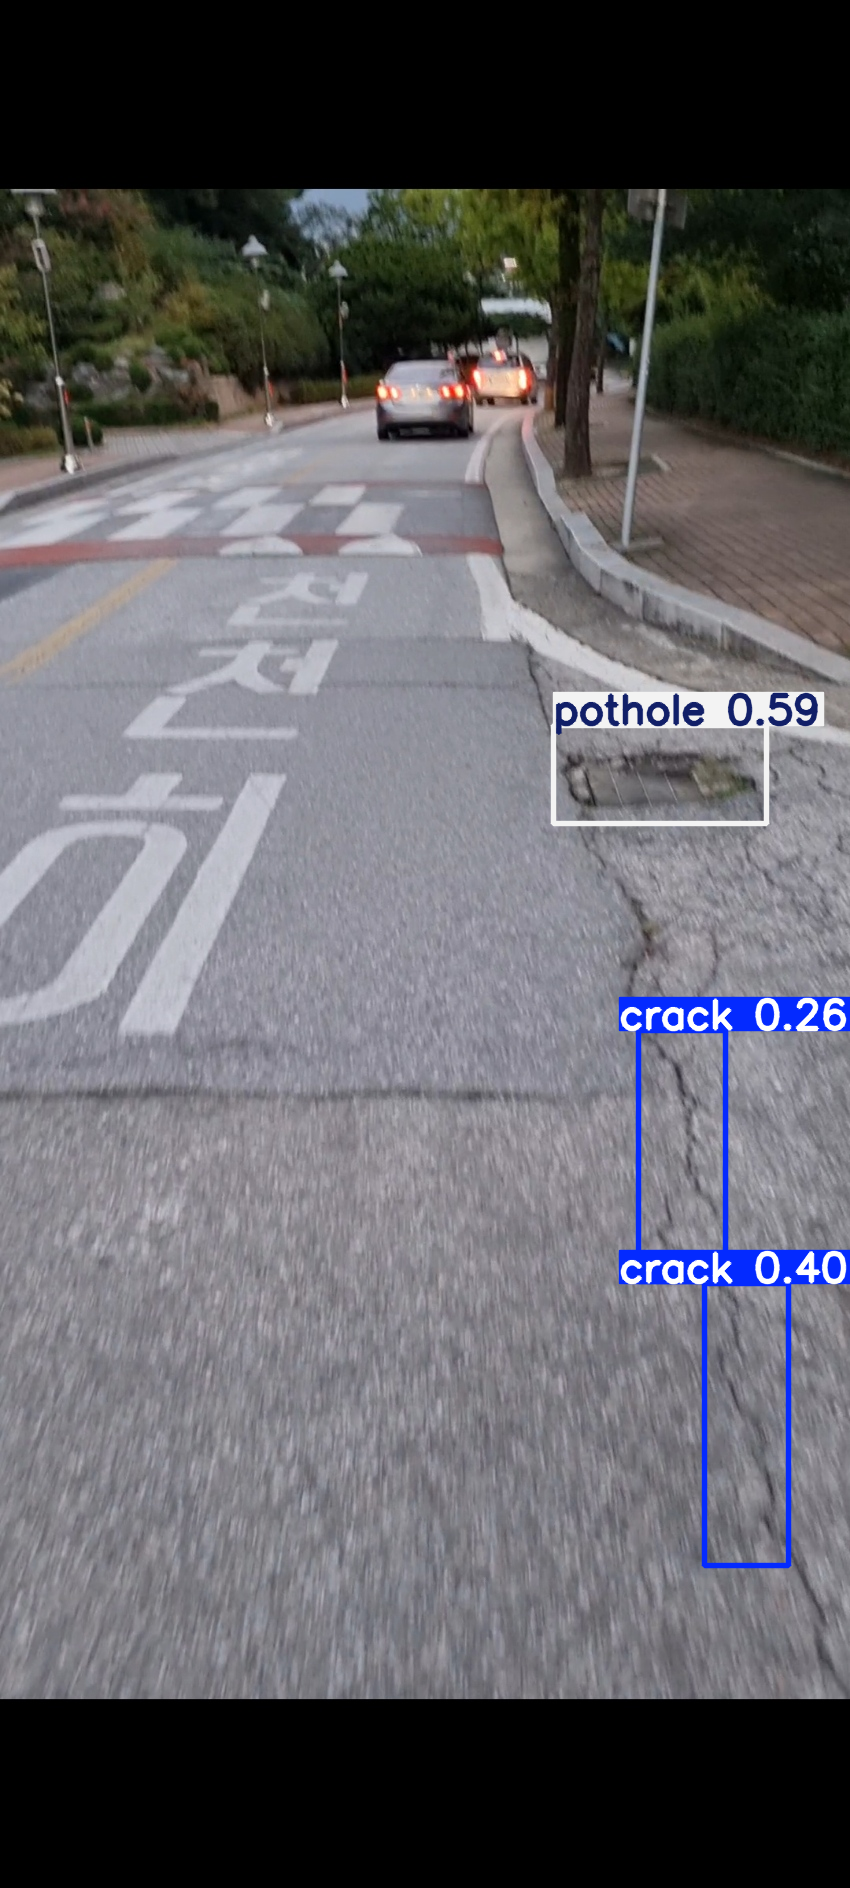

In [ ]:
results = model.predict("/content/drive/MyDrive/화면 캡처 2024-10-07 004550.png")  # 예측할 이미지나 비디오 경로
# 결과 리스트 내 각 결과에 대해 시각화
for result in results:
    result.show()  # 개별 결과 시각화

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# # 클래스별 데이터
# data = {
#     "Class": ["Other-obstacles", "car", "crack", "manhole", "person", "pothole", "speed bump"],
#     "mAP@0.5": [0.732, 0.873, 0.575, 0.535, 0.751, 0.504, 0.615],
#     "mAP@0.5:0.95": [0.347, 0.434, 0.271, 0.21, 0.359, 0.302, 0.371],
#     "Recall": [0.634, 0.773, 0.333, 0.444, 0.655, 0.5, 0.535]
# }

# # 데이터프레임 생성
# df = pd.DataFrame(data)

# # mAP 시각화
# fig, ax = plt.subplots(figsize=(10, 6))
# x = np.arange(len(df["Class"]))
# width = 0.35
# ax.bar(x - width / 2, df["mAP@0.5"], width, label='mAP@0.5', color='skyblue')
# ax.bar(x + width / 2, df["mAP@0.5:0.95"], width, label='mAP@0.5:0.95', color='lightgreen')

# # 그래프 세부 설정
# ax.set_xticks(x)
# ax.set_xticklabels(df["Class"], rotation=45)
# ax.set_ylabel('mAP Score')
# ax.set_title('mAP@0.5 and mAP@0.5:0.95 by Class')
# ax.legend()

# plt.tight_layout()
# plt.show()

# # Miss Rate 계산 및 시각화
# df["Miss Rate"] = [1 - r for r in df["Recall"]]  # Miss rate = 1 - Recall

# fig, ax = plt.subplots(figsize=(10, 6))
# ax.bar(df["Class"], df["Miss Rate"], color='salmon')

# # 그래프 세부 설정
# ax.set_ylabel('Miss Rate')
# ax.set_title('Miss Rate by Class (Based on Ground-Truth Missed)')
# ax.set_xticklabels(df["Class"], rotation=45)

# plt.tight_layout()
# plt.show()
